In [12]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii, write_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator, SinkFiller
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

from landlab.utils import watershed

In [13]:
# MEL-14 wet season year 1
(mg_m14_20201203_sfm,z_m14_20201203_sfm) = read_esri_ascii("m14/wsyr1/m14_20201203_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20210224_sfm,z_m14_20210224_sfm) = read_esri_ascii("m14/wsyr1/m14_20210224_sfm.asc", \
    name='topographic__elevation')
    
(mg_m14_20201203_lidar,z_m14_20201203_lidar) = read_esri_ascii("m14/wsyr1/m14_20201203_lidar.asc", \
    name='topographic__elevation')

# MEL-14 dry season year 1
(mg_m14_20210603_sfm,z_m14_20210603_sfm) = read_esri_ascii("m14/dsyr1/m14_20210603_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20210914_sfm,z_m14_20210914_sfm) = read_esri_ascii("m14/dsyr1/m14_20210914_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20210603_lidar,z_m14_20210603_lidar) = read_esri_ascii("m14/dsyr1/m14_20210603_lidar.asc", \
    name='topographic__elevation')
(mg_m14_20210914_lidar,z_m14_20210914_lidar) = read_esri_ascii("m14/dsyr1/m14_20210914_lidar.asc", \
    name='topographic__elevation')

# MEL-14 wet season year 2
(mg_m14_20220309_sfm,z_m14_20220309_sfm) = read_esri_ascii("m14/wsyr2/m14_20220309_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220316_sfm,z_m14_20220316_sfm) = read_esri_ascii("m14/wsyr2/m14_20220316_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220324_sfm,z_m14_20220324_sfm) = read_esri_ascii("m14/wsyr2/m14_20220324_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220411_sfm,z_m14_20220411_sfm) = read_esri_ascii("m14/wsyr2/m14_20220411_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220428_sfm,z_m14_20220428_sfm) = read_esri_ascii("m14/wsyr2/m14_20220428_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220601_sfm,z_m14_20220601_sfm) = read_esri_ascii("m14/wsyr2/m14_20220601_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220309_lidar,z_m14_20220309_lidar) = read_esri_ascii("m14/wsyr2/m14_20220309_lidar.asc", \
    name='topographic__elevation')
(mg_m14_20220601_lidar,z_m14_20220601_lidar) = read_esri_ascii("m14/wsyr2/m14_20220601_lidar.asc", \
    name='topographic__elevation')


## Cross-sectional profile plot

In [14]:
# mg_m14_20220309_sfm.status_at_node[z_m14_20220309_sfm == -9999] = mg_m14_20220309_sfm.BC_NODE_IS_CLOSED
# mg_m14_20220316_sfm.status_at_node[z_m14_20220316_sfm == -9999] = mg_m14_20220316_sfm.BC_NODE_IS_CLOSED
# mg_m14_20220324_sfm.status_at_node[z_m14_20220324_sfm == -9999] = mg_m14_20220324_sfm.BC_NODE_IS_CLOSED
# mg_m14_20220411_sfm.status_at_node[z_m14_20220411_sfm == -9999] = mg_m14_20220411_sfm.BC_NODE_IS_CLOSED
# mg_m14_20220428_sfm.status_at_node[z_m14_20220428_sfm == -9999] = mg_m14_20220428_sfm.BC_NODE_IS_CLOSED
# mg_m14_20220601_sfm.status_at_node[z_m14_20220601_sfm == -9999] = mg_m14_20220601_sfm.BC_NODE_IS_CLOSED

# mg_m14_20220309_lidar.status_at_node[z_m14_20220309_lidar == -9999] = mg_m14_20220309_lidar.BC_NODE_IS_CLOSED
# mg_m14_20220601_lidar.status_at_node[z_m14_20220601_lidar == -9999] = mg_m14_20220601_lidar.BC_NODE_IS_CLOSED

In [15]:
# nrows = mg_m14_20220309_sfm.number_of_node_rows

# z_m14_20220309_sfm[z_m14_20220309_sfm==-9999] = np.nan
# z_m14_20220316_sfm[z_m14_20220316_sfm==-9999] = np.nan
# z_m14_20220324_sfm[z_m14_20220324_sfm==-9999] = np.nan
# z_m14_20220411_sfm[z_m14_20220411_sfm==-9999] = np.nan
# z_m14_20220428_sfm[z_m14_20220428_sfm==-9999] = np.nan
# z_m14_20220601_sfm[z_m14_20220601_sfm==-9999] = np.nan
# z_m14_20220309_lidar[z_m14_20220309_lidar==-9999] = np.nan
# z_m14_20220601_lidar[z_m14_20220601_lidar==-9999] = np.nan

# elev_rast_20220309 = mg_m14_20220309_sfm.node_vector_to_raster(z_m14_20220309_sfm)
# xcoord_rast_20220309 = mg_m14_20220309_sfm.node_vector_to_raster(mg_m14_20220309_sfm.node_x)

# elev_rast_20220316 = mg_m14_20220316_sfm.node_vector_to_raster(z_m14_20220316_sfm)
# xcoord_rast_20220316 = mg_m14_20220316_sfm.node_vector_to_raster(mg_m14_20220316_sfm.node_x)

# elev_rast_20220324 = mg_m14_20220324_sfm.node_vector_to_raster(z_m14_20220324_sfm)
# xcoord_rast_20220324 = mg_m14_20220324_sfm.node_vector_to_raster(mg_m14_20220324_sfm.node_x)

# elev_rast_20220411 = mg_m14_20220411_sfm.node_vector_to_raster(z_m14_20220411_sfm)
# xcoord_rast_20220411 = mg_m14_20220411_sfm.node_vector_to_raster(mg_m14_20220411_sfm.node_x)

# elev_rast_20220428 = mg_m14_20220428_sfm.node_vector_to_raster(z_m14_20220428_sfm)
# xcoord_rast_20220428 = mg_m14_20220428_sfm.node_vector_to_raster(mg_m14_20220428_sfm.node_x)

# elev_rast_20220601 = mg_m14_20220601_sfm.node_vector_to_raster(z_m14_20220601_sfm)
# xcoord_rast_20220601 = mg_m14_20220601_sfm.node_vector_to_raster(mg_m14_20220601_sfm.node_x)

# elev_rast_20220309_lidar = mg_m14_20220309_lidar.node_vector_to_raster(z_m14_20220309_lidar)
# xcoord_rast_20220309_lidar = mg_m14_20220309_lidar.node_vector_to_raster(mg_m14_20220309_lidar.node_x)
# elev_rast_20220601_lidar = mg_m14_20220601_lidar.node_vector_to_raster(z_m14_20220601_lidar)
# xcoord_rast_20220601_lidar = mg_m14_20220601_lidar.node_vector_to_raster(mg_m14_20220601_lidar.node_x)

# fig, ax = plt.subplots(figsize=(10,4))
# plt.plot(xcoord_rast_20220309[int(nrows // 9.75),:]-min(xcoord_rast_20220309[int(nrows // 9.75),:]), elev_rast_20220309[int(nrows // 9.75), :]-500, color='#8BECF5', label='03-09-2022 SfM', linewidth=1)
# plt.plot(xcoord_rast_20220316[int(nrows // 9.75),:]-min(xcoord_rast_20220316[int(nrows // 9.75),:]), elev_rast_20220316[int(nrows // 9.75), :]-500, color='#33DEED', label='03-16-2022 SfM', linewidth=1)
# plt.plot(xcoord_rast_20220324[int(nrows // 9.75),:]-min(xcoord_rast_20220324[int(nrows // 9.75),:]), elev_rast_20220324[int(nrows // 9.75), :]-500, color='#10A5B2', label='03-24-2022 SfM', linewidth=1)
# plt.plot(xcoord_rast_20220411[int(nrows // 9.75),:]-min(xcoord_rast_20220411[int(nrows // 9.75),:]), elev_rast_20220411[int(nrows // 9.75), :]-500, color='#0B737D', label='04-11-2022 SfM', linewidth=1)
# plt.plot(xcoord_rast_20220428[int(nrows // 9.75),:]-min(xcoord_rast_20220428[int(nrows // 9.75),:]), elev_rast_20220428[int(nrows // 9.75), :]-500, color='#064247', label='04-28-2022 SfM', linewidth=1)
# plt.plot(xcoord_rast_20220601[int(nrows // 9.75),:]-min(xcoord_rast_20220601[int(nrows // 9.75),:]), elev_rast_20220601[int(nrows // 9.75), :]-500, color='#021012', label='06-01-2022 SfM', linewidth=1)
# plt.plot(xcoord_rast_20220309_lidar[int(nrows // 9.75),:]-min(xcoord_rast_20220309_lidar[int(nrows // 9.75),:]), elev_rast_20220309_lidar[int(nrows // 9.75), :]-500, '--', color='#8BECF5', label='03-09-2022 LiDAR', linewidth=1)
# plt.plot(xcoord_rast_20220601_lidar[int(nrows // 9.75),:]-min(xcoord_rast_20220601_lidar[int(nrows // 9.75),:]), elev_rast_20220601_lidar[int(nrows // 9.75), :]-500, '--', color='#021012', label='06-01-2022 LiDAR', linewidth=1)
# plt.legend(ncol=3)
# plt.xlabel("X location (m)")
# plt.ylabel("Relative elevation (m)")
# plt.title('MEL-14 Wet2')
# # plt.savefig('/mnt/c/Users/Amanda/OneDrive - UW/Dissertation Writing/Chapters/Ch4_mt/Fig6.png', dpi=600, bbox_inches='tight')
# plt.show();

## Run flow router

In [16]:
mg_m14_20201203_sfm.status_at_node[z_m14_20201203_sfm == -9999] = mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210224_sfm.status_at_node[z_m14_20210224_sfm == -9999] = mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20201203_lidar.status_at_node[z_m14_20201203_lidar == -9999] = mg_m14_20201203_lidar.BC_NODE_IS_FIXED_VALUE

mg_m14_20210603_sfm.status_at_node[z_m14_20210603_sfm == -9999] = mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210914_sfm.status_at_node[z_m14_20210914_sfm == -9999] = mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210603_lidar.status_at_node[z_m14_20210603_lidar == -9999] = mg_m14_20210603_lidar.BC_NODE_IS_FIXED_VALUE
mg_m14_20210914_lidar.status_at_node[z_m14_20210914_lidar == -9999] = mg_m14_20210914_lidar.BC_NODE_IS_FIXED_VALUE

mg_m14_20220309_sfm.status_at_node[z_m14_20220309_sfm == -9999] = mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220316_sfm.status_at_node[z_m14_20220316_sfm == -9999] = mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220324_sfm.status_at_node[z_m14_20220324_sfm == -9999] = mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220411_sfm.status_at_node[z_m14_20220411_sfm == -9999] = mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220428_sfm.status_at_node[z_m14_20220428_sfm == -9999] = mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220601_sfm.status_at_node[z_m14_20220601_sfm == -9999] = mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220309_lidar.status_at_node[z_m14_20220309_lidar == -9999] = mg_m14_20220309_lidar.BC_NODE_IS_FIXED_VALUE
mg_m14_20220601_lidar.status_at_node[z_m14_20220601_lidar == -9999] = mg_m14_20220601_lidar.BC_NODE_IS_FIXED_VALUE

In [17]:
fa_m14_20201203_sfm = FlowAccumulator(mg_m14_20201203_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20210224_sfm = FlowAccumulator(mg_m14_20210224_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20201203_lidar = FlowAccumulator(mg_m14_20201203_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')



fa_m14_20210603_sfm = FlowAccumulator(mg_m14_20210603_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20210914_sfm = FlowAccumulator(mg_m14_20210914_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20210603_lidar = FlowAccumulator(mg_m14_20210603_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20210914_lidar = FlowAccumulator(mg_m14_20210914_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')




fa_m14_20220309_sfm = FlowAccumulator(mg_m14_20220309_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220316_sfm = FlowAccumulator(mg_m14_20220316_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220324_sfm = FlowAccumulator(mg_m14_20220324_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220411_sfm = FlowAccumulator(mg_m14_20220411_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220428_sfm = FlowAccumulator(mg_m14_20220428_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220601_sfm = FlowAccumulator(mg_m14_20220601_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220309_lidar = FlowAccumulator(mg_m14_20220309_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220601_lidar = FlowAccumulator(mg_m14_20220601_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

In [18]:
(da_m14_20201203_sfm, Q_m14_20201203_sfm) = fa_m14_20201203_sfm.accumulate_flow()
(da_m14_20210224_sfm, Q_m14_20210224_sfm) = fa_m14_20210224_sfm.accumulate_flow()
(da_m14_20201203_lidar, Q_m14_20201203_lidar) = fa_m14_20201203_lidar.accumulate_flow()

(da_m14_20210603_sfm, Q_m14_20210603_sfm) = fa_m14_20210603_sfm.accumulate_flow()
(da_m14_20210914_sfm, Q_m14_20210914_sfm) = fa_m14_20210914_sfm.accumulate_flow()
(da_m14_20210603_lidar, Q_m14_20210603_lidar) = fa_m14_20210603_lidar.accumulate_flow()
(da_m14_20210914_lidar, Q_m14_20210914_lidar) = fa_m14_20210914_lidar.accumulate_flow()

(da_m14_20220309_sfm, Q_m14_20220309_sfm) = fa_m14_20220309_sfm.accumulate_flow()
(da_m14_20220316_sfm, Q_m14_20220316_sfm) = fa_m14_20220316_sfm.accumulate_flow()
(da_m14_20220324_sfm, Q_m14_20220324_sfm) = fa_m14_20220324_sfm.accumulate_flow()
(da_m14_20220411_sfm, Q_m14_20220411_sfm) = fa_m14_20220411_sfm.accumulate_flow()
(da_m14_20220428_sfm, Q_m14_20220428_sfm) = fa_m14_20220428_sfm.accumulate_flow()
(da_m14_20220601_sfm, Q_m14_20220601_sfm) = fa_m14_20220601_sfm.accumulate_flow()
(da_m14_20220309_lidar, Q_m14_20220309_lidar) = fa_m14_20220309_lidar.accumulate_flow()
(da_m14_20220601_lidar, Q_m14_20220601_lidar) = fa_m14_20220601_lidar.accumulate_flow()

## MEL-14 Wet1

In [19]:
len(mg_m14_20201203_sfm.core_nodes)*0.25*0.25

465.0625

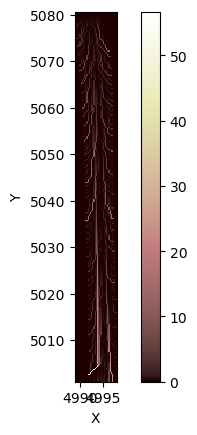

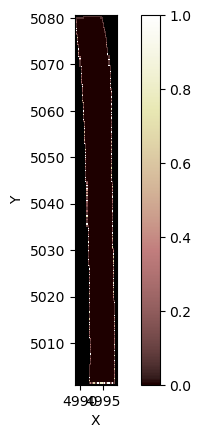

In [20]:
area = mg_m14_20201203_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20201203_sfm.node_has_boundary_neighbor(mg_m14_20201203_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20201203_sfm.imshow(mg_m14_20201203_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20201203_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20201203_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20201203_sfm.at_node['boundary_drainage'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20201203_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

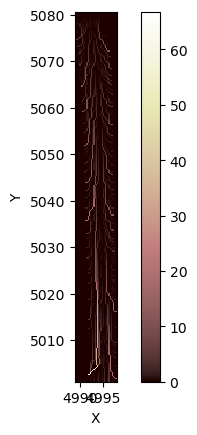

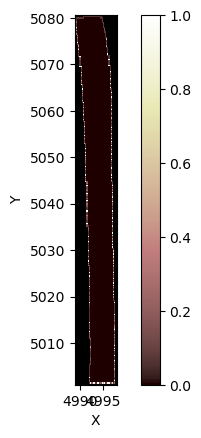

In [21]:
area = mg_m14_20201203_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20201203_lidar.node_has_boundary_neighbor(mg_m14_20201203_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20201203_lidar.imshow(mg_m14_20201203_lidar.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20201203_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20201203_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20201203_lidar.at_node['boundary_drainage'][mg_m14_20201203_lidar.status_at_node==mg_m14_20201203_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20201203_lidar, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

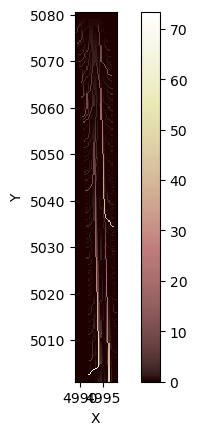

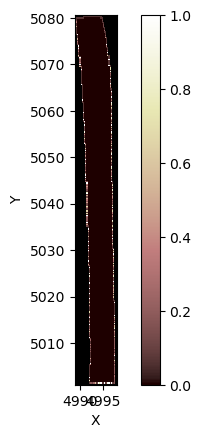

In [22]:
area = mg_m14_20210224_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210224_sfm.node_has_boundary_neighbor(mg_m14_20210224_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210224_sfm.imshow(mg_m14_20210224_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20210224_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210224_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210224_sfm.at_node['boundary_drainage'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210224_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [23]:
mg_m14_20201203_sfm.at_node['boundary_drainage'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20210224_sfm.at_node['boundary_drainage'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20201203_lidar.at_node['boundary_drainage'][mg_m14_20201203_lidar.status_at_node==mg_m14_20201203_lidar.BC_NODE_IS_FIXED_VALUE] = 18000

In [24]:
write_esri_ascii('m14/wsyr1/out/mg_m14_20201203_sfm_drainage.asc',mg_m14_20201203_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr1/out/mg_m14_20210224_sfm_drainage.asc',mg_m14_20210224_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr1/out/mg_m14_20201203_lidar_drainage.asc',mg_m14_20201203_lidar,names='boundary_drainage',clobber=True)

write_esri_ascii('m14/wsyr1/out/mg_m14_20201203_sfm_drainage_map.asc',mg_m14_20201203_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr1/out/mg_m14_20210224_sfm_drainage_map.asc',mg_m14_20210224_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr1/out/mg_m14_20201203_lidar_drainage_map.asc',mg_m14_20201203_lidar,names='drainage_area',clobber=True)

['m14/wsyr1/out/mg_m14_20201203_lidar_drainage_map.asc']

## MEL-14 Dry1

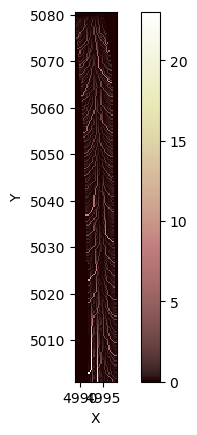

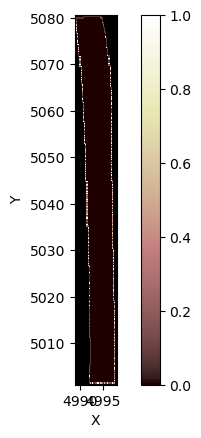

In [25]:
area = mg_m14_20210603_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210603_sfm.node_has_boundary_neighbor(mg_m14_20210603_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210603_sfm.imshow(mg_m14_20210603_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20210603_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210603_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210603_sfm.at_node['boundary_drainage'][mg_m14_20210603_sfm.status_at_node==mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210603_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

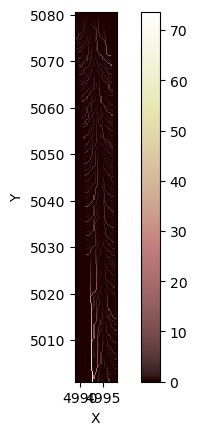

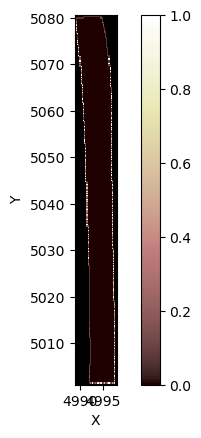

In [26]:
area = mg_m14_20210603_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210603_lidar.node_has_boundary_neighbor(mg_m14_20210603_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210603_lidar.imshow(mg_m14_20210603_lidar.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20210603_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210603_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210603_lidar.at_node['boundary_drainage'][mg_m14_20210603_lidar.status_at_node==mg_m14_20210603_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210603_lidar, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

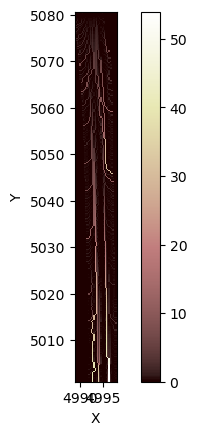

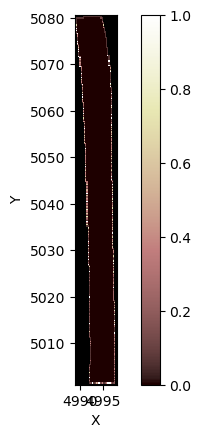

In [27]:
area = mg_m14_20210914_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210914_sfm.node_has_boundary_neighbor(mg_m14_20210914_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210914_sfm.imshow(mg_m14_20210914_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20210914_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210914_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210914_sfm.at_node['boundary_drainage'][mg_m14_20210914_sfm.status_at_node==mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210914_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

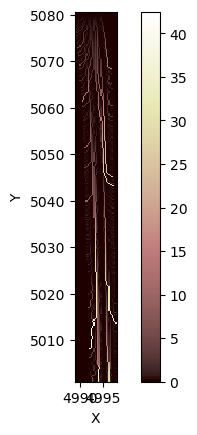

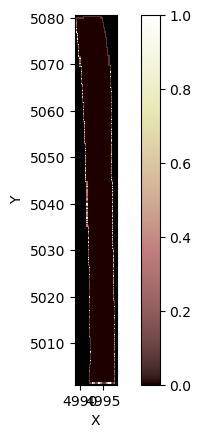

In [28]:
area = mg_m14_20210914_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210914_lidar.node_has_boundary_neighbor(mg_m14_20210914_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210914_lidar.imshow(mg_m14_20210914_lidar.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20210914_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210914_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210914_lidar.at_node['boundary_drainage'][mg_m14_20210914_lidar.status_at_node==mg_m14_20210914_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210914_lidar, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [29]:
mg_m14_20210603_sfm.at_node['boundary_drainage'][mg_m14_20210603_sfm.status_at_node==mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20210914_sfm.at_node['boundary_drainage'][mg_m14_20210914_sfm.status_at_node==mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20210603_lidar.at_node['boundary_drainage'][mg_m14_20210603_lidar.status_at_node==mg_m14_20210603_lidar.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20210914_lidar.at_node['boundary_drainage'][mg_m14_20210914_lidar.status_at_node==mg_m14_20210914_lidar.BC_NODE_IS_FIXED_VALUE] = 18000

In [30]:
write_esri_ascii('m14/dsyr1/out/mg_m14_20210603_sfm_drainage.asc',mg_m14_20210603_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/dsyr1/out/mg_m14_20210914_sfm_drainage.asc',mg_m14_20210914_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/dsyr1/out/mg_m14_20210603_lidar_drainage.asc',mg_m14_20210603_lidar,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/dsyr1/out/mg_m14_20210914_lidar_drainage.asc',mg_m14_20210914_lidar,names='boundary_drainage',clobber=True)

write_esri_ascii('m14/dsyr1/out/mg_m14_20210603_sfm_drainage_map.asc',mg_m14_20210603_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/dsyr1/out/mg_m14_20210914_sfm_drainage_map.asc',mg_m14_20210914_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/dsyr1/out/mg_m14_20210603_lidar_drainage_map.asc',mg_m14_20210603_lidar,names='drainage_area',clobber=True)
write_esri_ascii('m14/dsyr1/out/mg_m14_20210914_lidar_drainage_map.asc',mg_m14_20210914_lidar,names='drainage_area',clobber=True)

['m14/dsyr1/out/mg_m14_20210914_lidar_drainage_map.asc']

## MEL-14 Wet2

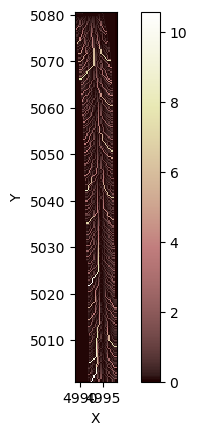

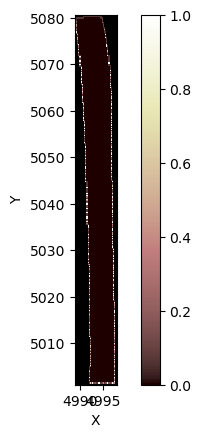

In [31]:
area = mg_m14_20220309_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220309_sfm.node_has_boundary_neighbor(mg_m14_20220309_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220309_sfm.imshow(mg_m14_20220309_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220309_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220309_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220309_sfm.at_node['boundary_drainage'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220309_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

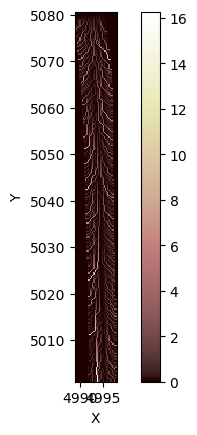

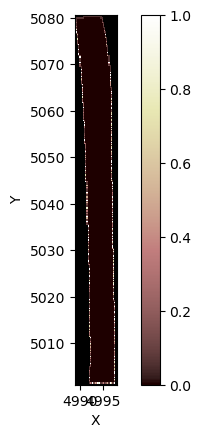

In [32]:
area = mg_m14_20220309_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220309_lidar.node_has_boundary_neighbor(mg_m14_20220309_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220309_lidar.imshow(mg_m14_20220309_lidar.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220309_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220309_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220309_lidar.at_node['boundary_drainage'][mg_m14_20220309_lidar.status_at_node==mg_m14_20220309_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220309_lidar, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

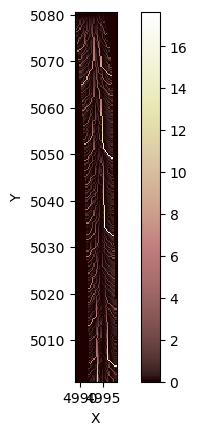

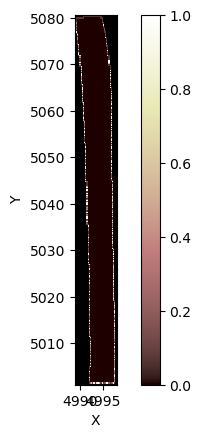

In [33]:
area = mg_m14_20220316_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220316_sfm.node_has_boundary_neighbor(mg_m14_20220316_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220316_sfm.imshow(mg_m14_20220316_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220316_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220316_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220316_sfm.at_node['boundary_drainage'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220316_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

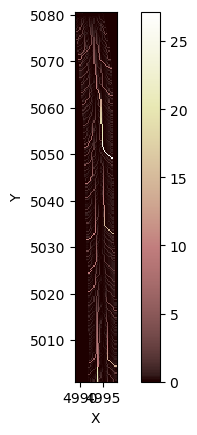

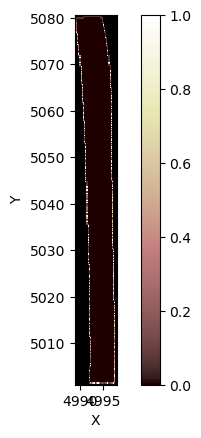

In [34]:
area = mg_m14_20220324_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220324_sfm.node_has_boundary_neighbor(mg_m14_20220324_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220324_sfm.imshow(mg_m14_20220324_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220324_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220324_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220324_sfm.at_node['boundary_drainage'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220324_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

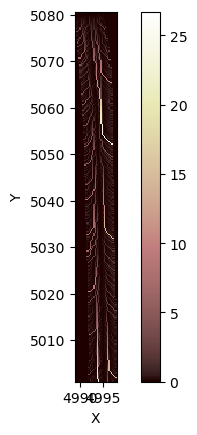

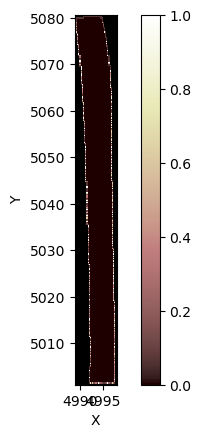

In [35]:
area = mg_m14_20220411_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220411_sfm.node_has_boundary_neighbor(mg_m14_20220411_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220411_sfm.imshow(mg_m14_20220411_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220411_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220411_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220411_sfm.at_node['boundary_drainage'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220411_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

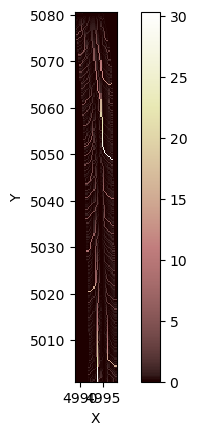

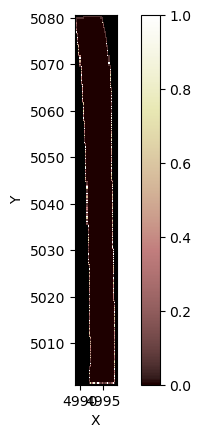

In [36]:
area = mg_m14_20220428_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220428_sfm.node_has_boundary_neighbor(mg_m14_20220428_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220428_sfm.imshow(mg_m14_20220428_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220428_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220428_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220428_sfm.at_node['boundary_drainage'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220428_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

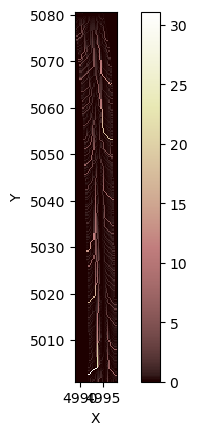

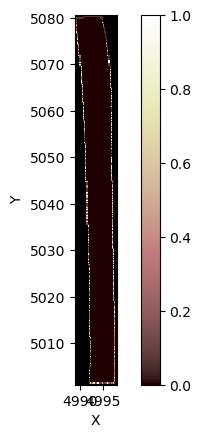

In [37]:
area = mg_m14_20220601_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220601_sfm.node_has_boundary_neighbor(mg_m14_20220601_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220601_sfm.imshow(mg_m14_20220601_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220601_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220601_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220601_sfm.at_node['boundary_drainage'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220601_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

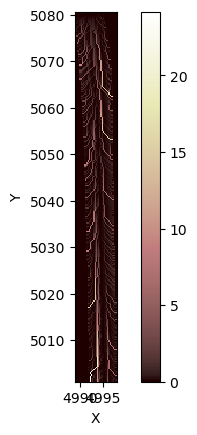

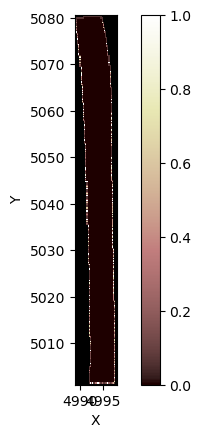

In [38]:
area = mg_m14_20220601_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220601_lidar.node_has_boundary_neighbor(mg_m14_20220601_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220601_lidar.imshow(mg_m14_20220601_lidar.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220601_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220601_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220601_lidar.at_node['boundary_drainage'][mg_m14_20220601_lidar.status_at_node==mg_m14_20220601_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220601_lidar, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [39]:
mg_m14_20220309_sfm.at_node['boundary_drainage'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220316_sfm.at_node['boundary_drainage'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220324_sfm.at_node['boundary_drainage'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220411_sfm.at_node['boundary_drainage'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220428_sfm.at_node['boundary_drainage'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220601_sfm.at_node['boundary_drainage'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220309_lidar.at_node['boundary_drainage'][mg_m14_20220309_lidar.status_at_node==mg_m14_20220309_lidar.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220601_lidar.at_node['boundary_drainage'][mg_m14_20220601_lidar.status_at_node==mg_m14_20220601_lidar.BC_NODE_IS_FIXED_VALUE] = 18000

mg_m14_20220309_sfm.at_node['drainage_area'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220316_sfm.at_node['drainage_area'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220324_sfm.at_node['drainage_area'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220411_sfm.at_node['drainage_area'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220428_sfm.at_node['drainage_area'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220601_sfm.at_node['drainage_area'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220309_lidar.at_node['drainage_area'][mg_m14_20220309_lidar.status_at_node==mg_m14_20220309_lidar.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220601_lidar.at_node['drainage_area'][mg_m14_20220601_lidar.status_at_node==mg_m14_20220601_lidar.BC_NODE_IS_FIXED_VALUE] = 18000

In [40]:
write_esri_ascii('m14/wsyr2/out/mg_m14_20220309_sfm_drainage.asc',mg_m14_20220309_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220316_sfm_drainage.asc',mg_m14_20220316_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220324_sfm_drainage.asc',mg_m14_20220324_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220411_sfm_drainage.asc',mg_m14_20220411_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220428_sfm_drainage.asc',mg_m14_20220428_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220601_sfm_drainage.asc',mg_m14_20220601_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220309_lidar_drainage.asc',mg_m14_20220309_lidar,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220601_lidar_drainage.asc',mg_m14_20220601_lidar,names='boundary_drainage',clobber=True)

write_esri_ascii('m14/wsyr2/out/mg_m14_20220309_sfm_drainage_map.asc',mg_m14_20220309_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220316_sfm_drainage_map.asc',mg_m14_20220316_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220324_sfm_drainage_map.asc',mg_m14_20220324_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220411_sfm_drainage_map.asc',mg_m14_20220411_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220428_sfm_drainage_map.asc',mg_m14_20220428_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220601_sfm_drainage_map.asc',mg_m14_20220601_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220309_lidar_drainage_map.asc',mg_m14_20220309_lidar,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220601_lidar_drainage_map.asc',mg_m14_20220601_lidar,names='drainage_area',clobber=True)

['m14/wsyr2/out/mg_m14_20220601_lidar_drainage_map.asc']